In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("spam.csv",  encoding="latin1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df.shape

(5572, 5)

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
df.rename(columns={
    'v1':'target',
    'v2':'text',
},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['target']=encoder.fit_transform(df['target'])

In [15]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.duplicated().sum()

np.int64(403)

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

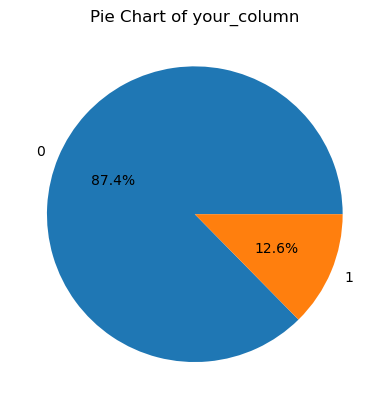

In [20]:
counts = df['target'].value_counts()

plt.pie(counts, labels=counts.index,autopct='%1.1f%%')
plt.title("Pie Chart of your_column")
plt.show()

In [21]:
import nltk

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")
df['tokens'] = df['text'].apply(lambda x: [token.text for token in nlp(str(x))])

In [25]:
df

,target,text,num_characters,tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì, _, b, going, to, esplanade, fr, home..."
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,..."


In [26]:
df['word_count'] = df['tokens'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [27]:
df

,target,text,num_characters,tokens,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",20
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",13
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",30
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì, _, b, going, to, esplanade, fr, home...",8
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",10
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",26


In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Sentence tokenization
df['sentences'] = df['text'].apply(lambda x: [sent.text for sent in nlp(str(x)).sents])

In [29]:
df

,target,text,num_characters,tokens,word_count,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",20,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",6,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",11,"[U dun say so early hor..., U c already then s..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",13,"[Nah I don't think he goes to usf, he lives ar..."
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",30,[This is the 2nd time we have tried 2 contact ...
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì, _, b, going, to, esplanade, fr, home...",8,[Will Ì_ b going to esplanade fr home?]
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",10,"[Pity, * was in mood for that., So...any other..."
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",26,"[The guy did some bitching, but I acted like i..."


In [30]:
df["sentence_count"] = df["sentences"].apply(len)

In [31]:
df

,target,text,num_characters,tokens,word_count,sentences,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",20,"[Go until jurong point, crazy.., Available onl...",3
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",6,"[Ok lar..., Joking wif u oni...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28,[Free entry in 2 a wkly comp to win FA Cup fin...,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",11,"[U dun say so early hor..., U c already then s...",2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",13,"[Nah I don't think he goes to usf, he lives ar...",1
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",30,[This is the 2nd time we have tried 2 contact ...,4
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì, _, b, going, to, esplanade, fr, home...",8,[Will Ì_ b going to esplanade fr home?],1
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",10,"[Pity, * was in mood for that., So...any other...",2
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",26,"[The guy did some bitching, but I acted like i...",3


In [32]:
df= df.drop(columns=['tokens','sentences'])
df

,target,text,num_characters,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,4
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,2
5570,0,The guy did some bitching but I acted like i'd...,125,26,3


In [33]:
df[['num_characters','word_count','sentence_count']].describe()

,num_characters,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.100987
std,58.236293,11.068488,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,27.000000


In [34]:
#ham
df[df['target'] == 0][['num_characters','word_count','sentence_count']].describe()

,num_characters,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.961913
std,56.358207,11.116240,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,27.000000


In [35]:
#spam
df[df['target'] == 1][['num_characters','word_count','sentence_count']].describe()

,num_characters,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.062787
std,30.137753,5.967672,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

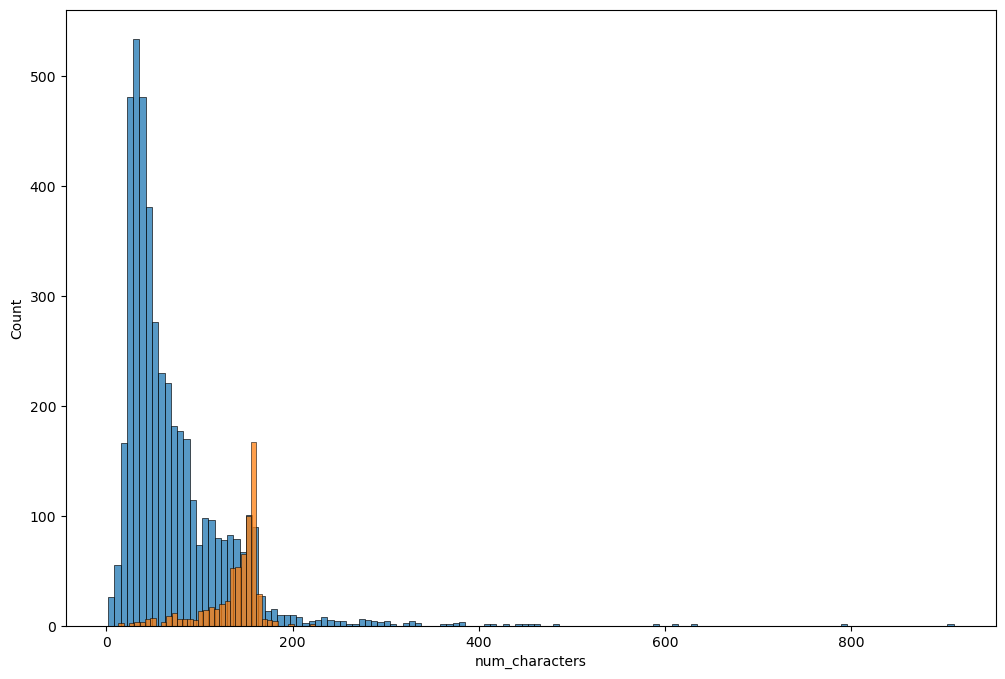

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='word_count', ylabel='Count'>

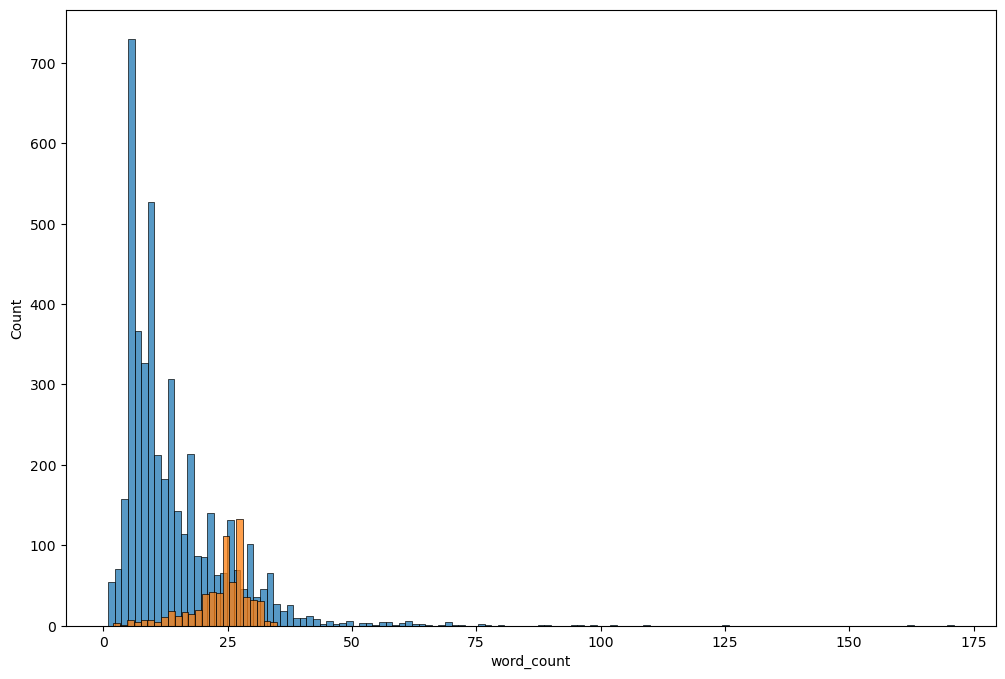

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['word_count'])
sns.histplot(df[df['target']==1]['word_count'])

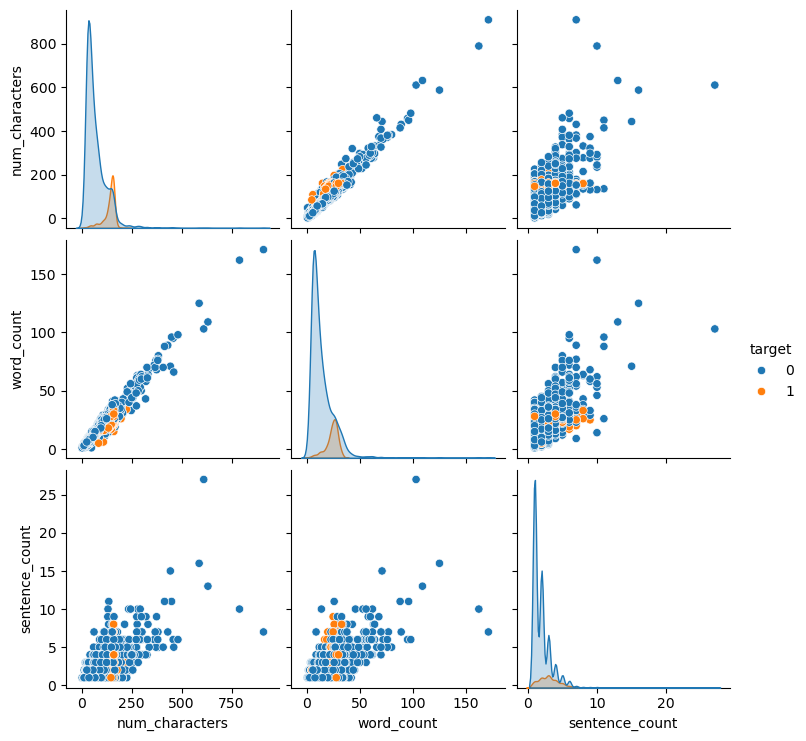

In [39]:
sns.pairplot(df,hue='target')

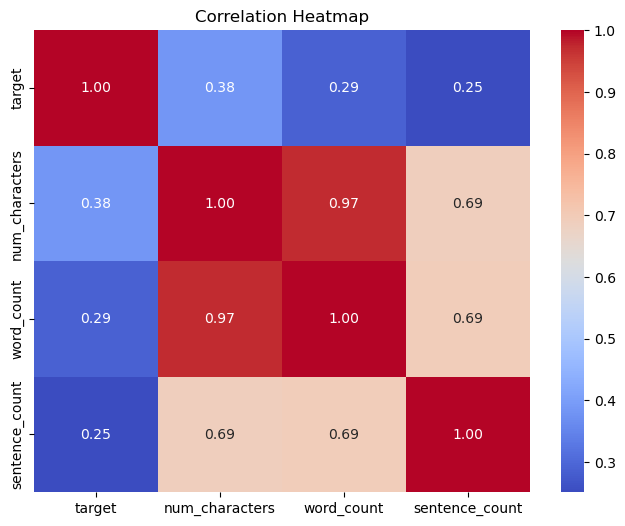

In [40]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [41]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Utkarsh
[nltk_data]     Dimri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Utkarsh
[nltk_data]     Dimri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # remove stopwords and punctuation
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]

    # stemming
    y = [ps.stem(i) for i in y]
        
    return " ".join(y)


In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # remove stopwords and punctuation
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]

    # stemming
    y = [ps.stem(i) for i in y]
        
    return " ".join(y)

# apply function
df['transformed_text'] = df['text'].apply(transform_text)


In [47]:
df.head()

,target,text,num_characters,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [48]:
!pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc= WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [50]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

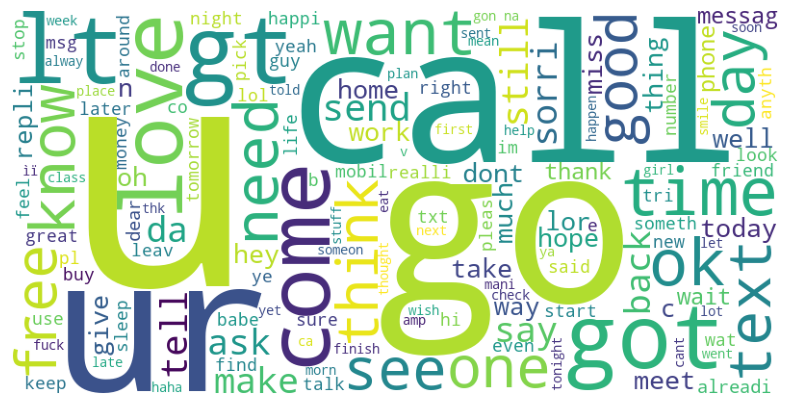

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white')

# Example: generate from your transformed text column
text_data = " ".join(df['transformed_text'])
plt.figure(figsize=(10, 5))
plt.imshow(wc.generate(text_data))
plt.axis("off")
plt.show()


In [52]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [53]:
len(spam_corpus)

9939

In [54]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    ham_corpus.append(words)

In [55]:
len(ham_corpus)

4516

In [56]:
#model building

In [57]:
df.head()

,target,text,num_characters,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [58]:
#vectorization

In [59]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tfid = TfidfVectorizer()
cv= CountVectorizer()

In [60]:
X= tfid.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 6708)

In [62]:
y= df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [67]:
gnb.fit(X_train, y_train)

# Predict
y_pred_gnb = gnb.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb, average='macro')) 

Accuracy: 0.8636363636363636
Confusion Matrix:
 [[772 117]
 [ 24 121]]
Precision: 0.7391263037878468


In [68]:
mnb.fit(X_train, y_train)

# Predict
y_pred_mnb = mnb.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Precision:", precision_score(y_test, y_pred_mnb, average='macro')) 

Accuracy: 0.9613152804642167
Confusion Matrix:
 [[888   1]
 [ 39 106]]
Precision: 0.9742915040982367


In [69]:
bnb.fit(X_train, y_train)

# Predict
y_pred_bnb = bnb.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("Precision:", precision_score(y_test, y_pred_bnb, average='macro')) 

Accuracy: 0.9661508704061895
Confusion Matrix:
 [[885   4]
 [ 31 114]]
Precision: 0.9661294500777144


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='sigmoid', gamma=1.0),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "MultinomialNB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [72]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    
    results.append([name, acc, prec, cm])

In [74]:
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Confusion Matrix"])
print(df_results)

                  Model  Accuracy  Precision        Confusion Matrix
0   Logistic Regression  0.948743   0.945885    [[883, 6], [47, 98]]
1                   SVM  0.971954   0.958056   [[881, 8], [21, 124]]
2                   KNN  0.896518   0.946285   [[889, 0], [107, 38]]
3         Decision Tree  0.936170   0.884348  [[866, 23], [43, 102]]
4         MultinomialNB  0.961315   0.974292   [[888, 1], [39, 106]]
5         Random Forest  0.970019   0.979350   [[888, 1], [30, 115]]
6              AdaBoost  0.914894   0.858111   [[868, 21], [67, 78]]
7               Bagging  0.960348   0.927257  [[873, 16], [25, 120]]
8           Extra Trees  0.970986   0.979914   [[888, 1], [29, 116]]
9     Gradient Boosting  0.965184   0.965458   [[885, 4], [32, 113]]
10              XGBoost  0.970019   0.956510   [[881, 8], [23, 122]]


In [76]:
df_results.sort_values(by=["Accuracy", "Precision"], ascending=False)


,Model,Accuracy,Precision,Confusion Matrix
1,SVM,0.971954,0.958056,"[[881, 8], [21, 124]]"
8,Extra Trees,0.970986,0.979914,"[[888, 1], [29, 116]]"
5,Random Forest,0.970019,0.979350,"[[888, 1], [30, 115]]"
10,XGBoost,0.970019,0.956510,"[[881, 8], [23, 122]]"
9,Gradient Boosting,0.965184,0.965458,"[[885, 4], [32, 113]]"
4,MultinomialNB,0.961315,0.974292,"[[888, 1], [39, 106]]"
7,Bagging,0.960348,0.927257,"[[873, 16], [25, 120]]"
0,Logistic Regression,0.948743,0.945885,"[[883, 6], [47, 98]]"
3,Decision Tree,0.936170,0.884348,"[[866, 23], [43, 102]]"
6,AdaBoost,0.914894,0.858111,"[[868, 21], [67, 78]]"


In [78]:
import pickle

pickle.dump(tfid, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
